In [11]:
# !pip install yfinance==0.2.4
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period='max')
# print(tesla_data.head(5))

In [12]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data,"html5lib")
# print(soup.prettify())

In [3]:
tesla_revenue = pd.DataFrame(columns = ["Date","Revenue"])

for table in soup.find_all('table'):
    if table.find('th').getText().startswith("Tesla Quarterly Revenue"):
        for row in table.find("tbody").find_all("tr"):
            col = row.find_all("td")
            if len(col) != 2: continue
            Date = col[0].text
            Revenue = col[1].text.replace("$","").replace(",","")
               
            tesla_revenue = tesla_revenue.append({"Date":Date, "Revenue":Revenue}, ignore_index=True)
            
tesla_revenue.dropna(axis=0, how='all', subset=['Revenue']) #drop NaN values
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""] #drop empty string values


In [4]:
tesla_revenue.tail(5)

,Date,Revenue


In [5]:
GameStop = yf.Ticker("GME")
gme_data = GameStop.history(period="max")
gme_data.reset_index(inplace=True)
gme_data.head(5)


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712708,1.716074,1.670626,1.683251,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674835,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [6]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

html_data  = requests.get(url).text
soup = BeautifulSoup(html_data,"html5lib")
gme_revenue = pd.DataFrame(columns = ["Date","Revenue"])

for table in soup.find_all('table'):
    if table.find('th').getText().startswith("GameStop Quarterly Revenue"):
        for row in table.find("tbody").find_all("tr"):
            col = row.find_all("td")
            if len(col) != 2: continue
            Date = col[0].text
            Revenue = col[1].text.replace("$","").replace(",","")
               
            gme_revenue = gme_revenue.append({"Date":Date, "Revenue":Revenue}, ignore_index=True)

In [7]:
gme_revenue.tail()

,Date,Revenue
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475
61,2005-01-31,709


In [8]:
def make_graph(data1, data2, title):
    try:
        plt.plot(data1['Date'], data1['Close'], label='Stock Closing Price', color='blue')
    except KeyError:
        print("Error: 'Date' or 'Close' column not found in data1")

    try:
        plt.plot(data2['Date'], data2['Revenue'], label='Revenue', color='orange')
    except KeyError:
        print("Error: 'Date' or 'Revenue' column not found in data2")

    plt.xlabel('Date')
    plt.title(title)
    plt.legend()
    plt.show()

Error: 'Date' or 'Close' column not found in data1


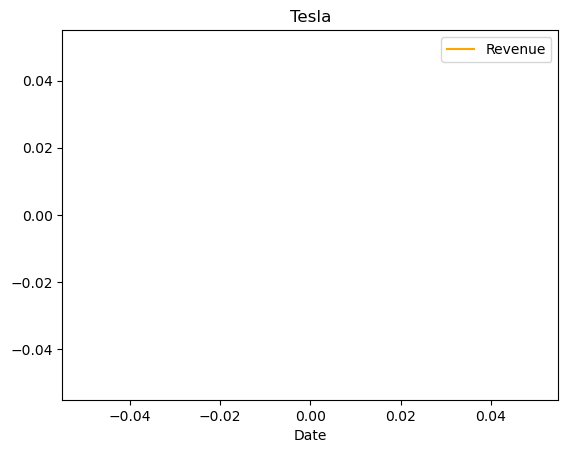

In [9]:
make_graph(tesla_data, tesla_revenue, 'Tesla')

AttributeError: 'America/New_York' object has no attribute 'update'

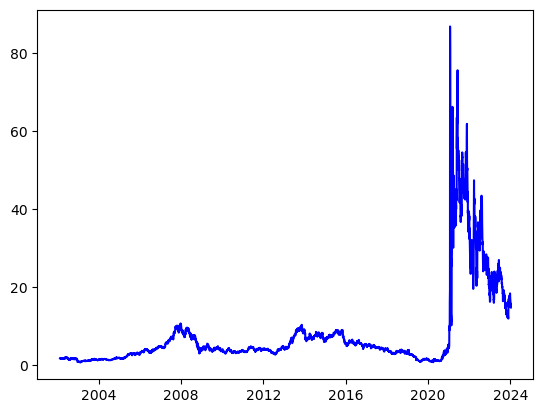

In [10]:
make_graph(gme_data, gme_revenue, 'GameStop')